In [1]:
#Package for numerics and dataframe
import pandas as pd
import numpy as np

#package for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#package for date conversion
from datetime import datetime
from datetime import date
from datetime import timedelta

#package for OLS, MLR, Confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import warnings

# Use the warnings module to filter out specific warnings
warnings.filterwarnings("ignore")

# Make sure to disable the scroll bar
%matplotlib inline

# Set the context to control the plot size
sns.set_context("notebook")

In [2]:
df = pd.read_csv(r"C:\Users\mani ganesh\Downloads\taxi data\2017_Yellow_Taxi_Trip_Data (1).csv")
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [4]:
df.size

408582

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [7]:
df.nunique()

Unnamed: 0               22699
VendorID                     2
tpep_pickup_datetime     22687
tpep_dropoff_datetime    22688
passenger_count              7
trip_distance             1545
RatecodeID                   6
store_and_fwd_flag           2
PULocationID               152
DOLocationID               216
payment_type                 4
fare_amount                185
extra                        6
mta_tax                      3
tip_amount                 742
tolls_amount                38
improvement_surcharge        3
total_amount              1369
dtype: int64

In [8]:
#converting data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

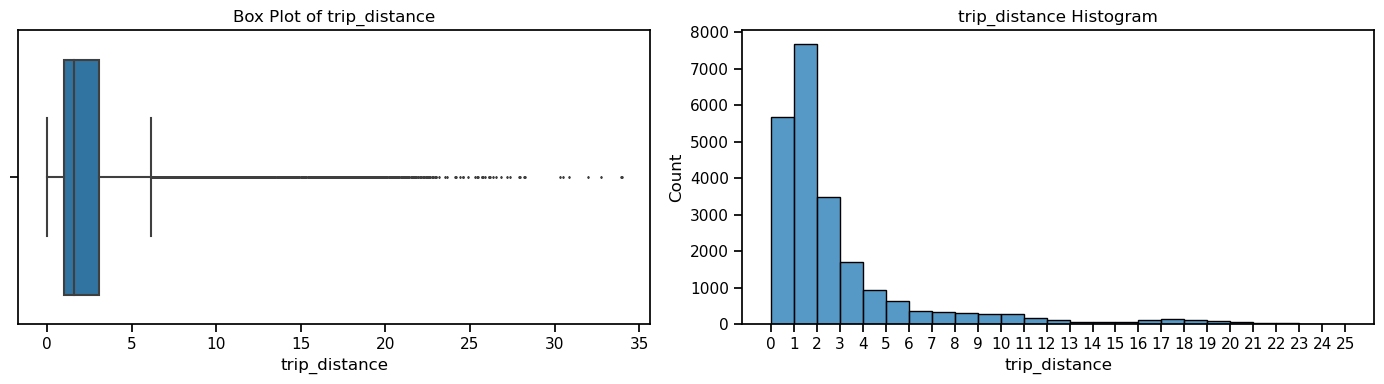

In [9]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Box plot of trip distance
sns.boxplot(x=df['trip_distance'], fliersize=1, ax=axes[0])
axes[0].set_title('Box Plot of trip_distance')

# Histogram of trip distance
ax = sns.histplot(df['trip_distance'], bins=range(0, 26, 1), ax=axes[1])
ax.set_xticks(range(0, 26, 1))
ax.set_xticklabels(range(0, 26, 1))
axes[1].set_title('trip_distance Histogram')

# Adjust spacing between subplots
plt.tight_layout()

The majority of trips were journeys of less than two miles. The number of trips
falls away steeply as the distance traveled increases beyond two miles

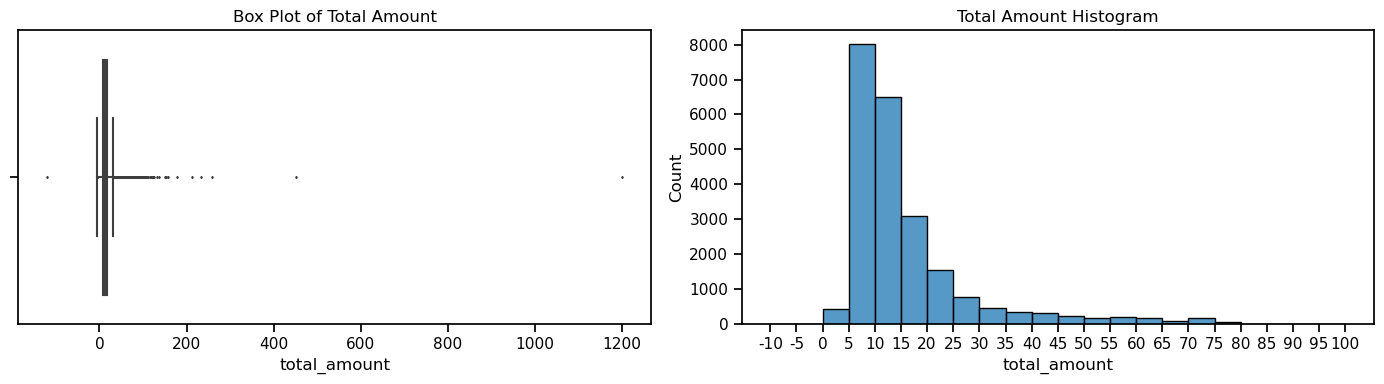

In [10]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Box plot of total_amount
sns.boxplot(x=df['total_amount'], fliersize=1, ax=axes[0])
axes[0].set_title('Box Plot of Total Amount')

# Histogram of total_amount
ax = sns.histplot(df['total_amount'], bins=range(-10, 101, 5), ax=axes[1])
ax.set_xticks(range(-10, 101, 5))
ax.set_xticklabels(range(-10, 101, 5))
axes[1].set_title('Total Amount Histogram')

# Adjust spacing between subplots
plt.tight_layout()

The total cost of each trip also has a distribution that skews right, with most
costs falling in the $5-15 range.

Text(0.5, 1.0, 'Tip amount histogram')

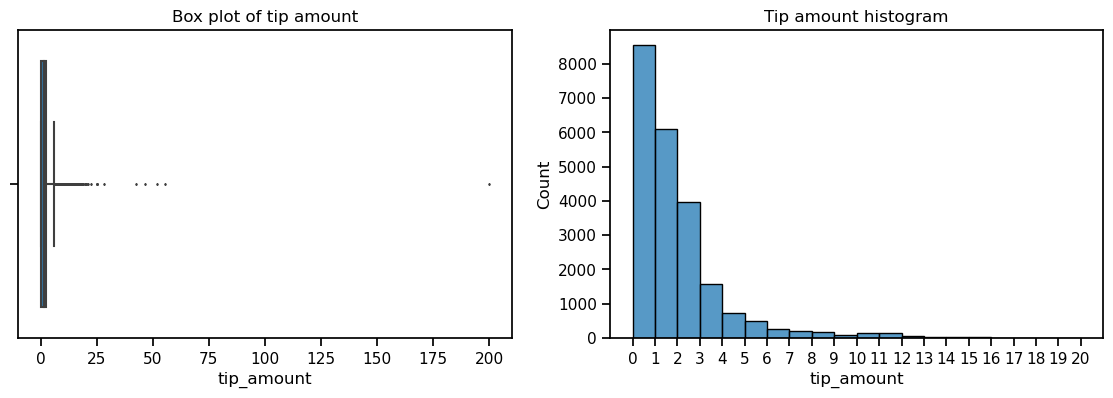

In [11]:
#create a figure with two subplots
fig, axes = plt.subplots(1,2, figsize = (14,4))

#box plot of tip amount
sns.boxplot(x=df['tip_amount'],fliersize=1, ax= axes[0])
axes[0].set_title('Box plot of tip amount')

#histogram of tip amount
ax = sns.histplot(df['tip_amount'], bins = range(0,21,1))
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
axes[1].set_title('Tip amount histogram')

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range

Text(0.5, 1.0, 'tip amount by vendor histogram')

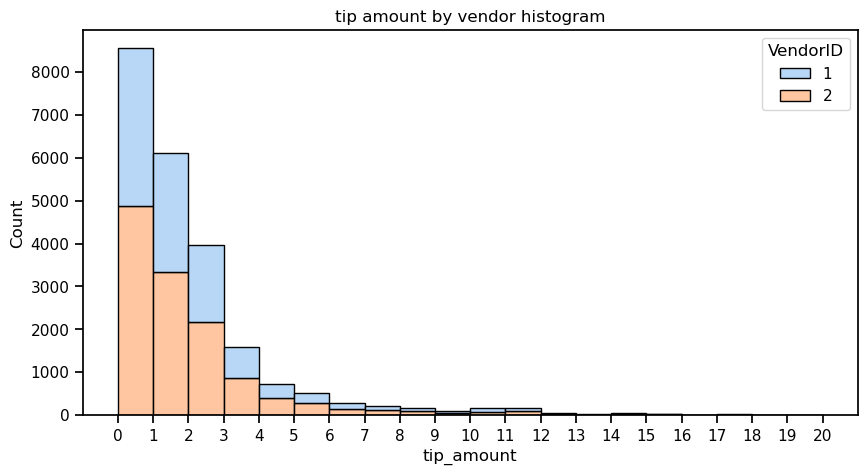

In [12]:
#histogram of tip_amount by vendor
plt.figure(figsize = (10,5))
ax = sns.histplot(data = df, x = 'tip_amount', bins=range(0,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('tip amount by vendor histogram')

There are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly
higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Text(0.5, 1.0, 'tip amount by vendor histogram')

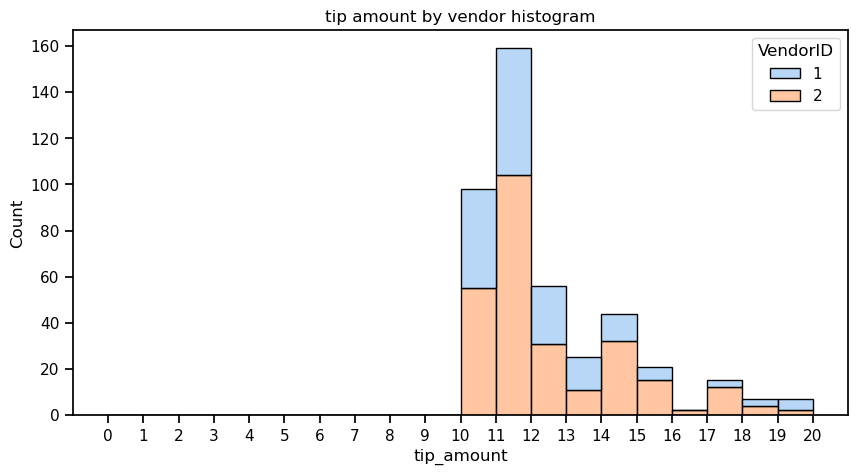

In [13]:
#histogram of tip_amount by vendor for ips > 10
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize = (10,5))
ax = sns.histplot(data = tips_over_ten, x = 'tip_amount', bins=range(0,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('tip amount by vendor histogram')

The proportions are maintained even at these higher tip amounts, with the
exception being at highest extremity.

In [14]:
#unique values in the passenger count
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

Nearly two thirds of the rides were single occupancy, though there were still
nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count
of zero, which doesn’t make sense. These would likely be dropped

In [15]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [16]:
mean_tips_by_passenger_count.tip_amount.mean()

1.8116474806258194

Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it’s expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).


In [17]:
#Create a month and day column

df['month'] = df ['tpep_pickup_datetime'].dt.month_name()

df['day'] = df ['tpep_pickup_datetime'].dt.day_name()

In [18]:
#total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [19]:
#reordering the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July','August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

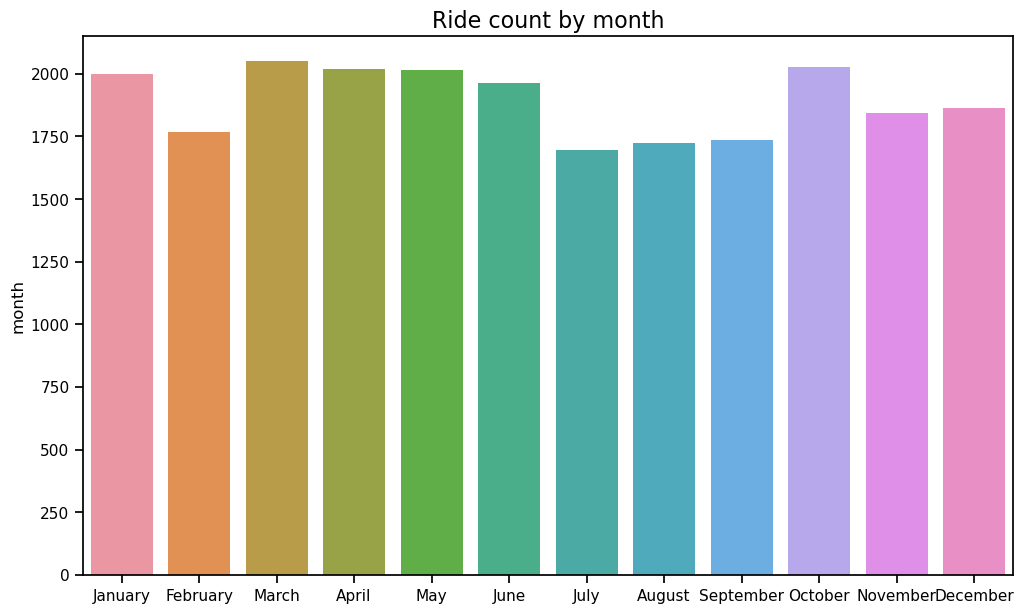

In [20]:
#bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

Monthly rides are fairly consistent, with notable dips in 
July, August, and September, and also in February.


In [21]:
# Rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

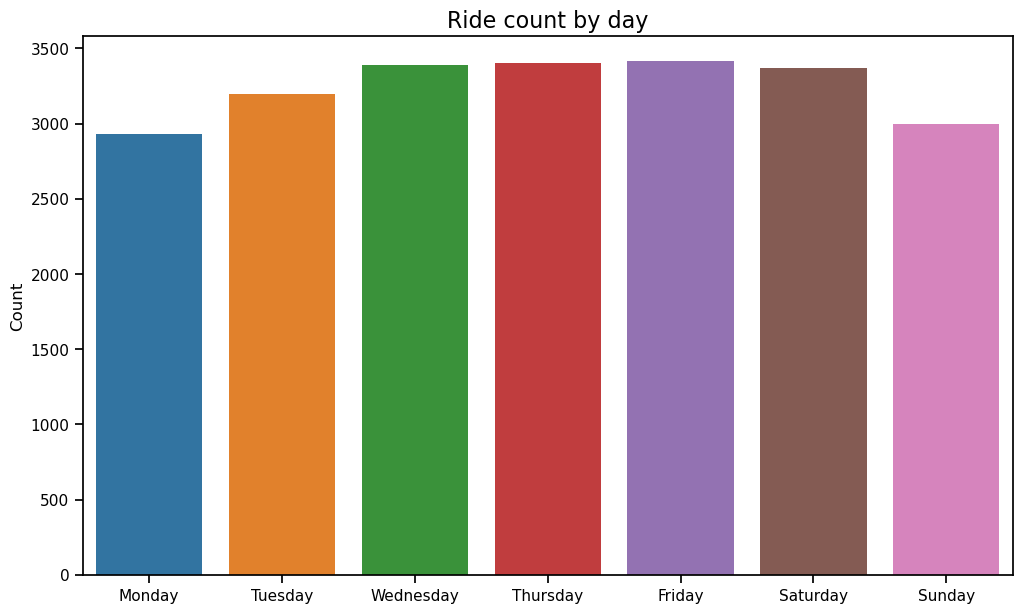

In [22]:
#bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

Wednesday through Saturday had the highest number of daily rides,
while Sunday and Monday had the least.


In [23]:
# total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
total_amount_day = df.groupby('day').sum(numeric_only = True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


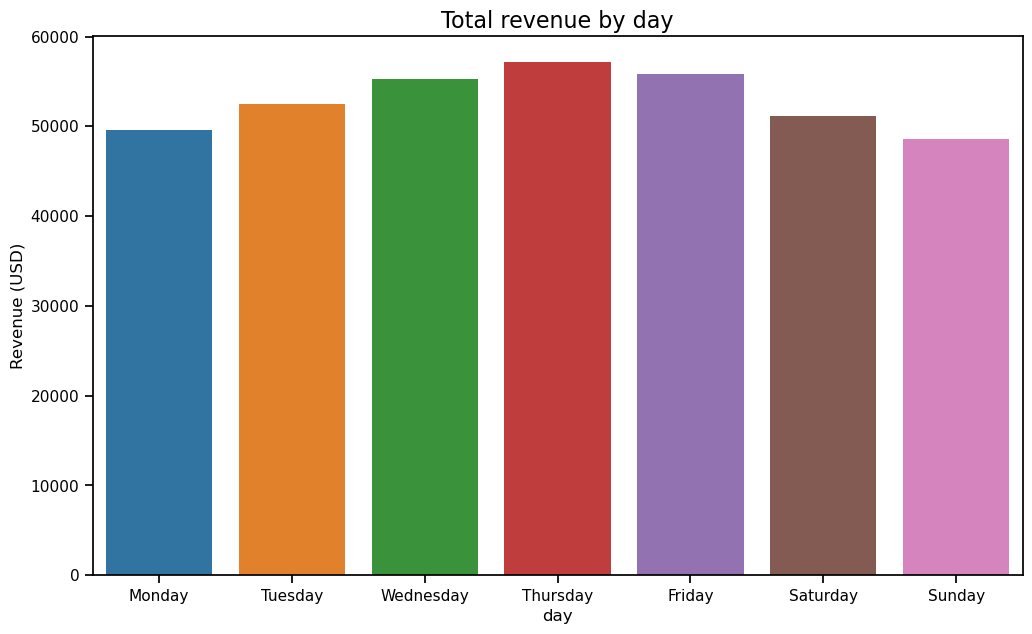

In [24]:
# bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Thursday had the highest gross revenue of all days, and Sunday and Monday
had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross
revenue was ~$6,000 less than Thursday’s—more than a 10% drop.


In [25]:
#total revenue by month
total_amount_month = df.groupby('month').sum(numeric_only = True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month


,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


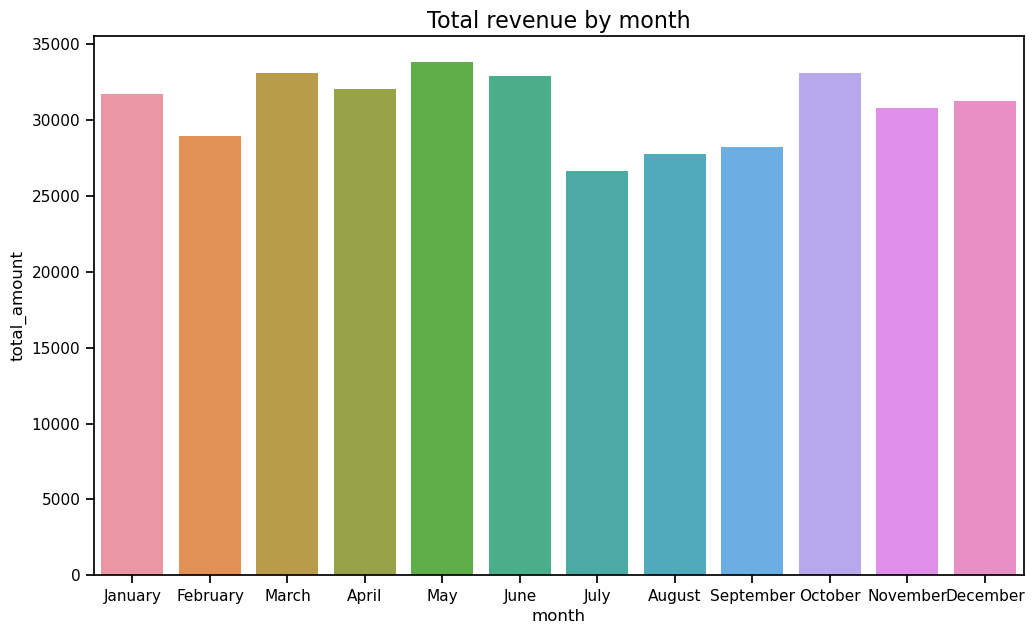

In [26]:
#bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index,y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

Monthly revenue generally follows the pattern of monthly rides, with noticeable
dips in July, August, and September, and also one in February.

In [27]:
#number unique location drop_off id's
df['DOLocationID'].nunique()

216

In [28]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean()[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff


,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


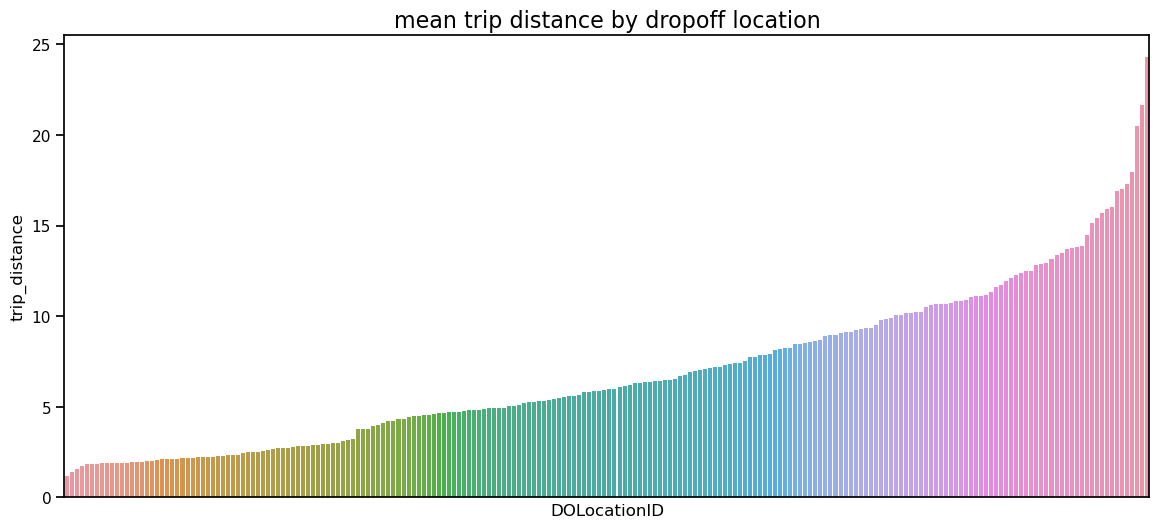

In [29]:
#Bar plot of mean trip distances by drop-off location
plt.figure(figsize=(14,6))
ax= sns.barplot(x=distance_by_dropoff.index,
               y=distance_by_dropoff['trip_distance'],
               order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('mean trip distance by dropoff location', fontsize = 16);

the drop-off points are relatively
evenly distributed over the terrain

In [30]:
#drop off locations are consecutively numbered
df['DOLocationID'].max()-len(set(df['DOLocationID']))

49

There are 49 numbers that do not represent a drop-off location.

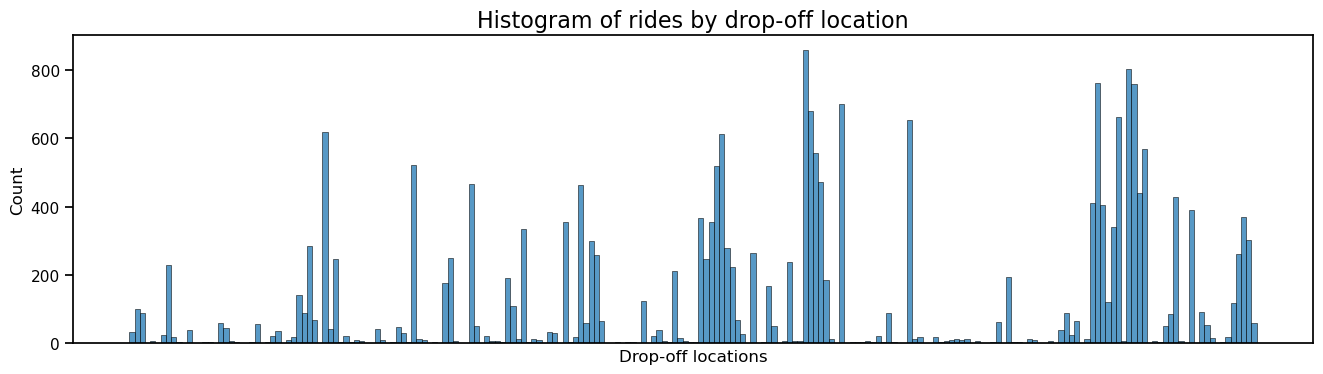

In [31]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')

sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Out of the 200+ drop-off locations, a disproportionate number of
locations receive the majority of the traffic, while all the rest get relatively few trips. It’s likely
that these high-traffic locations are near popular tourist attractions. 

In [32]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


#### Relationship between fare amount and payment type

In [33]:
from scipy import stats

In [34]:
df.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7
top,NaN,NaN,2017-07-03 15:45:19,2017-10-18 20:07:45,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,Friday
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049,3413
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,NaN,NaN
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,NaN,NaN
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,NaN,NaN
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,NaN,NaN


In the dataset, payment_type is encoded in integers: 
* 1: Credit card 
* 2: Cash 
* 3: No charge 
* 4: Dispute 


In [35]:
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

#### Hypothesis Testing
H0: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

HA: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

In [36]:
#hypothesis test
credit_card = df[df['payment_type']==1]['fare_amount']
cash = df[df['payment_type']==2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)

In a t-test, one of the assumptions is that the variances of the two groups being compared are equal. This is known as the assumption of homogeneity of variances or homoscedasticity. However, in some cases, it may not be reasonable to assume that the variances of the two groups are equal. When you have reason to believe that the variances are not equal, you can set equal_var=False to perform a t-test that does not assume equal variances.

Choose 5% as the significance level 

Since the p-value is significantly smaller than the significance level of 5%,
you reject the null hypothesis

Conclusion - that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash

####  Build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [38]:
df.shape

(22699, 20)

In [39]:
df.drop_duplicates().shape

(22699, 20)

In [40]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
month                    0
day                      0
dtype: int64

In [41]:
# Check the format of the data
df['tpep_dropoff_datetime'][0]

Timestamp('2017-03-25 09:09:47')

In [42]:
# Convert pickup and dropoff to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],
                                            format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],
                                             format='%m/%d/%Y %I:%M:%S %p')

In [43]:
#new duration column
df['duration'] = (df['tpep_dropoff_datetime']- df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [45]:
#fare amount outliers
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [46]:
df[df['fare_amount'] > 100]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
1928,51087145,1,2017-06-16 18:30:08,2017-06-16 19:18:50,2,12.50,5,N,211,265,...,120.00,0.0,0.0,5.00,12.50,0.3,137.80,June,Friday,48.700000
3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,...,152.00,0.0,0.0,0.00,0.00,0.3,152.30,January,Sunday,0.683333
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,...,107.00,0.0,0.0,55.50,16.26,0.3,179.06,June,Tuesday,67.483333
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,...,999.99,0.0,0.0,200.00,0.00,0.3,1200.29,February,Monday,0.966667
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,...,150.00,0.0,0.0,0.00,0.00,0.3,150.30,June,Sunday,39.216667
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,...,131.00,0.0,0.5,0.00,0.00,0.3,131.80,September,Monday,37.900000
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,5,N,265,265,...,120.00,0.0,0.0,20.00,11.52,0.3,151.82,June,Monday,0.916667
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,...,175.00,0.0,0.0,46.69,11.75,0.3,233.74,December,Sunday,0.300000
13621,93330154,1,2017-11-04 13:32:14,2017-11-04 14:18:50,2,19.80,5,N,265,230,...,105.00,0.0,0.0,8.00,2.64,0.3,115.94,November,Saturday,46.600000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,...,200.01,0.0,0.5,51.64,5.76,0.3,258.21,May,Friday,60.150000


In [47]:
df['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [48]:
df[(df['fare_amount'] > 100) & (df['trip_distance'] < 2.9)].head(10)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,...,999.99,0.0,0.0,200.00,0.00,0.3,1200.29,February,Monday,0.966667
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.0,5,N,265,265,...,120.00,0.0,0.0,20.00,11.52,0.3,151.82,June,Monday,0.916667
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.0,5,N,265,265,...,175.00,0.0,0.0,46.69,11.75,0.3,233.74,December,Sunday,0.300000
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.0,5,N,265,265,...,200.00,0.0,0.5,11.00,0.00,0.3,211.80,June,Tuesday,0.083333
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.0,5,N,265,265,...,450.00,0.0,0.0,0.00,0.00,0.3,450.30,December,Tuesday,0.150000


This data filter the fare amount which is greater than 100 and trip distance less than the mean value(2.9) as it not seems to be correct value this are the outliers

In [49]:
df = df[~((df['fare_amount'] > 100) & (df['trip_distance'] < 2.9))]
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.00,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.00,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.00,0.3,8.75,December,Friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.00,0.3,27.69,May,Sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.00,0.3,17.80,April,Saturday,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,4.0,1.0,0.5,0.00,0.00,0.3,5.80,February,Friday,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,52.0,0.0,0.5,14.64,5.76,0.3,73.20,August,Sunday,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,4.5,0.0,0.5,0.00,0.00,0.3,5.30,September,Monday,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,10.5,0.0,0.5,1.70,0.00,0.3,13.00,July,Saturday,11.933333


In [50]:
df[df['fare_amount'] < 0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,...,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,December,Wednesday,0.483333
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,...,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,July,Wednesday,0.616667
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,...,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,November,Thursday,1.333333
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,...,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,April,Thursday,2.216667
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,...,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,January,Tuesday,0.266667
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,...,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,October,Saturday,2.383333
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.00,1,N,238,238,...,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3,June,Monday,2.066667
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,...,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,July,Sunday,2.850000
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,...,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3,April,Saturday,1395.683333
14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,...,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,December,Sunday,3.166667


In [51]:
#remove the outliers when fare amount < 0
df = df[~(df['fare_amount'] < 0)]
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.00,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.00,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.00,0.3,8.75,December,Friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.00,0.3,27.69,May,Sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.00,0.3,17.80,April,Saturday,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,4.0,1.0,0.5,0.00,0.00,0.3,5.80,February,Friday,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,52.0,0.0,0.5,14.64,5.76,0.3,73.20,August,Sunday,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,4.5,0.0,0.5,0.00,0.00,0.3,5.30,September,Monday,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,10.5,0.0,0.5,1.70,0.00,0.3,13.00,July,Saturday,11.933333


In [52]:
df['duration'].describe()

count    22680.000000
mean        16.965236
std         61.341513
min        -16.983333
25%          6.666667
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [53]:
df[df['duration'] < 0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,...,28.0,0.5,0.5,0.0,0.0,0.3,29.3,November,Sunday,-16.983333


In [54]:
#remove the outliers when duartion < 0
df = df[~(df['duration'] < 0)]
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.00,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.00,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.00,0.3,8.75,December,Friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.00,0.3,27.69,May,Sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.00,0.3,17.80,April,Saturday,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,4.0,1.0,0.5,0.00,0.00,0.3,5.80,February,Friday,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,52.0,0.0,0.5,14.64,5.76,0.3,73.20,August,Sunday,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,4.5,0.0,0.5,0.00,0.00,0.3,5.30,September,Monday,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,10.5,0.0,0.5,1.70,0.00,0.3,13.00,July,Saturday,11.933333


#### Feature Engineering

In [55]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' +df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

Trip distance is not same even if the pickup and dropoff point is same 
For example:

A -> B: 1.25 miles; 
C -> D: 2 miles; 
D -> C: 3 miles; 

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column mean_distance will be added where the value at each row is the average for all trips with those pickup and dropoff locations:


In [56]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [57]:
# 1. Converting `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [58]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper␣column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [59]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [60]:
# creating month and day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b')

In [61]:
#create rush hour column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

#if daya is saturday or sunday, impute 0 in rush_hour column
df.loc[df['day'].isin(['saturday','sunday']), 'rush_hour'] = 0

In [62]:
#create a function
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [63]:
 # Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,Mar,Saturday,14.066667,100 231,3.521667,22.847222,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,Apr,Tuesday,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,Dec,Friday,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,May,Sunday,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,Apr,Saturday,16.716667,4 112,4.435000,14.616667,0


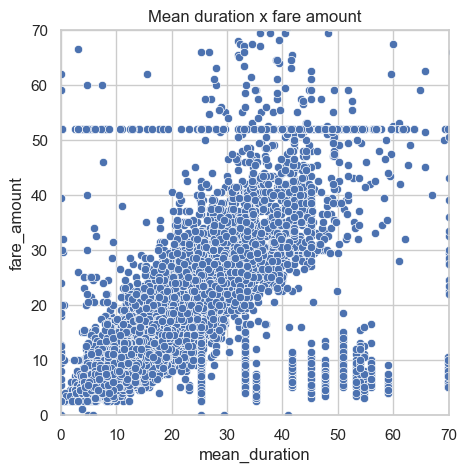

In [64]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.scatterplot(x=df['mean_duration'], y=df['fare_amount'])
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The mean_duration variable correlates with the target variable. But what are the horizontal lines
around fare amounts of 52 dollars? What are the values and how many are there?


In [65]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
59.0      9
50.5      9
57.5      8
51.0      7
Name: fare_amount, dtype: int64

In [66]:
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,Mar,Sunday,36.800000,236 132,19.211667,265.147222,1
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,Jun,Saturday,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,Nov,Saturday,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,Dec,Wednesday,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,Sep,Sunday,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,...,5.54,0.3,62.84,Feb,Tuesday,39.833333,132 48,18.761905,61.604762,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,...,5.76,0.3,58.56,Jun,Monday,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,...,5.76,0.3,58.56,Aug,Thursday,45.450000,132 48,18.761905,61.604762,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,...,5.76,0.3,58.56,Sep,Tuesday,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,...,0.00,0.3,57.80,Apr,Sunday,71.583333,132 148,17.994286,46.340476,0


In [67]:
len(df[df['fare_amount'] == 52])

514

In [68]:
len(df[(df['fare_amount'] == 52) & (df['pickup_dropoff'].str.contains("132"))])


459

It seems that almost all of the trips in the rows where the fare amount was $52 either begin
or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars.
They seem to occur on all different days, at different times, with both vendors, in all months.
However, there are many toll amounts of $5.76 and \$5.54. This would seem to indicate that
location 132 is in an area that frequently requires tolls to get to and from. It’s likely this is an
airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy
International Airport. A quick Google search for “new york city taxi flat rate $52” indicates that
in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between
JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed
back into the data after the model makes its predictions. This way you know that those data points
will always be correct.

#### Isolating model varibles

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22679 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22679 non-null  int64         
 1   VendorID               22679 non-null  int64         
 2   tpep_pickup_datetime   22679 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22679 non-null  datetime64[ns]
 4   passenger_count        22679 non-null  int64         
 5   trip_distance          22679 non-null  float64       
 6   RatecodeID             22679 non-null  int64         
 7   store_and_fwd_flag     22679 non-null  object        
 8   PULocationID           22679 non-null  int64         
 9   DOLocationID           22679 non-null  int64         
 10  payment_type           22679 non-null  int64         
 11  fare_amount            22679 non-null  float64       
 12  extra                  22679 non-null  float64       
 13  m

In [70]:
#create a copy of the data
df2 = df.copy()

columns_to_drop = [
    'Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
    'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
    'PULocationID', 'DOLocationID',
    'payment_type', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge',
    'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
    'duration',
    'pickup_dropoff', 'day', 'month'
]

df2 = df2.drop(columns=columns_to_drop, axis=1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22679 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22679 non-null  int64  
 1   passenger_count  22679 non-null  int64  
 2   fare_amount      22679 non-null  float64
 3   mean_distance    22679 non-null  float64
 4   mean_duration    22679 non-null  float64
 5   rush_hour        22679 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


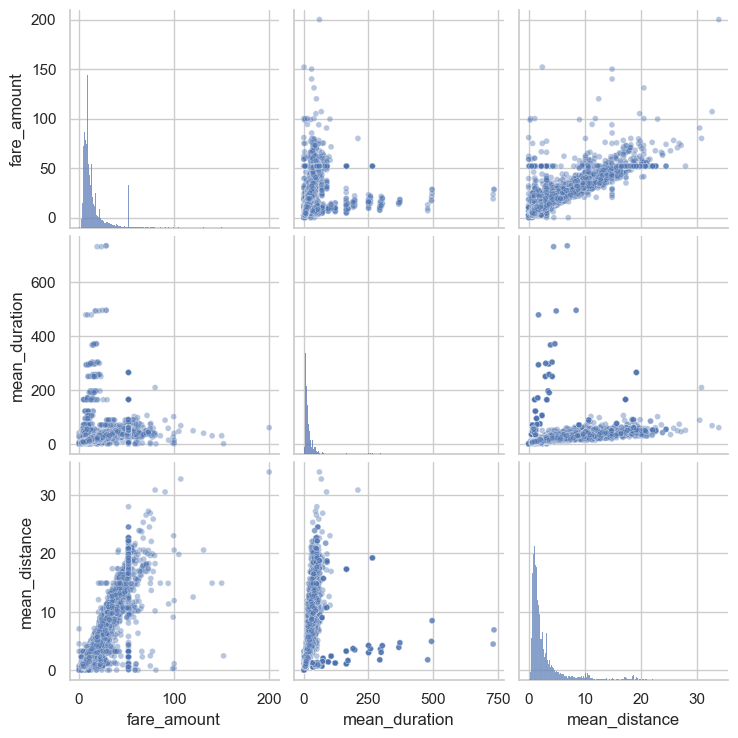

In [71]:
# pair plot
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},);

Target variable(fare amount) show correlation with mean distance

In [72]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266626,0.002687,0.005156,0.004833,-0.006547
passenger_count,0.266626,1.000000,0.014810,0.013467,0.008827,-0.010996
fare_amount,0.002687,0.014810,1.000000,0.899184,0.375611,-0.015204
mean_distance,0.005156,0.013467,0.899184,1.000000,0.390750,-0.028370
mean_duration,0.004833,0.008827,0.375611,0.390750,1.000000,-0.011593
rush_hour,-0.006547,-0.010996,-0.015204,-0.028370,-0.011593,1.000000


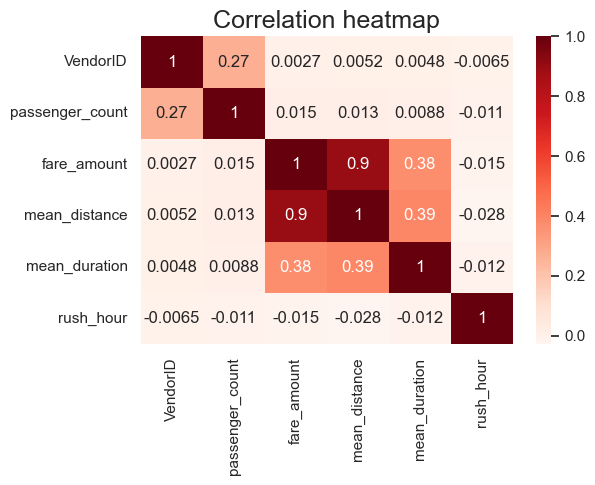

In [73]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
fontsize=18)
plt.show()

mean_distance are highly correlated with the
target variable of fare_amount

In [74]:
# remove the target column from the feature
x = df2.drop(columns = ['fare_amount'])

#set y variable
y = df2[['fare_amount']]

x.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,1
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [75]:
# covert vendorID to string
x['VendorID'] = x['VendorID'].astype(str)

#get dummies
x = pd.get_dummies(x, drop_first=True)
x.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,1,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [76]:
#split data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [77]:
# Standardize the X variables
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
print('X_train scaled:', x_train_scaled)

X_train scaled: [[-0.49723976 -0.44772554 -0.35315792  1.26418629  0.8947711 ]
 [-0.49723976  0.46067779  0.38692279 -0.79102266  0.8947711 ]
 [ 1.06640024 -0.54020474 -0.45125412  1.26418629  0.8947711 ]
 ...
 [-0.49723976  0.07479824  0.34486522 -0.79102266 -1.11760427]
 [-0.49723976 -0.29433263 -0.04409188 -0.79102266  0.8947711 ]
 [ 1.06640024 -0.48519689 -0.44861368  1.26418629 -1.11760427]]


In [78]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [79]:
# Evaluate the model performance on the training data
r_sq = lr.score(x_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(x_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))


Coefficient of determination: 0.81596631432855
R^2: 0.81596631432855
MAE: 2.523614093894087
MSE: 21.602410338264765
RMSE: 4.647839319325138


In [80]:
# Scale the X_test data
X_test_scaled = scaler.transform(x_test)

In [81]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.7852353529450777
R^2: 0.7852353529450777
MAE: 2.5457664086133907
MSE: 28.037369551992427
RMSE: 5.295032535498949


The model performance is high on both training and test sets, suggesting that
there is little bias in the model and that the model is not overfit. 

For the test data, an R2 of 0.785 means that 78.5% of the variance in the fare_amount variable is
described by the model.


In [82]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
16783,8.0,7.300283,0.699717
517,4.0,7.176523,-3.176523
5011,8.0,7.504668,0.495332
16431,16.5,17.432023,-0.932023
7288,23.5,23.943179,-0.443179


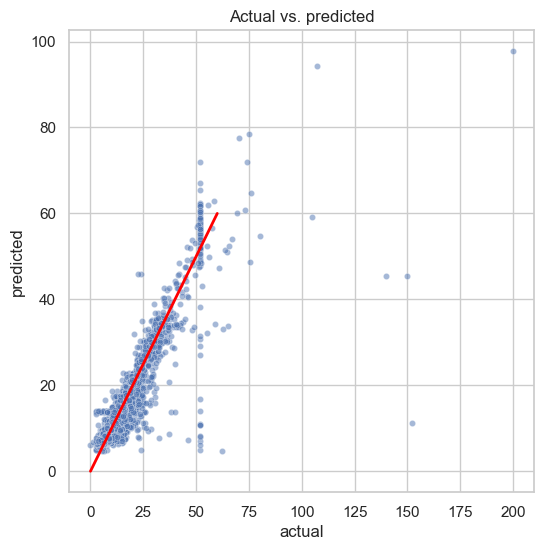

In [83]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
y='predicted',
data=results,
s=20,
alpha=0.5,
ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');


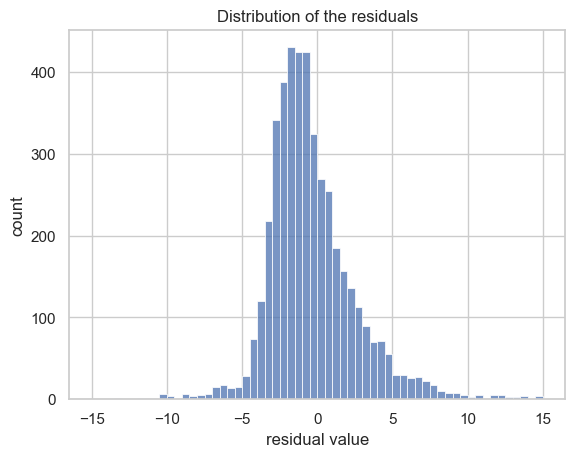

In [84]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');


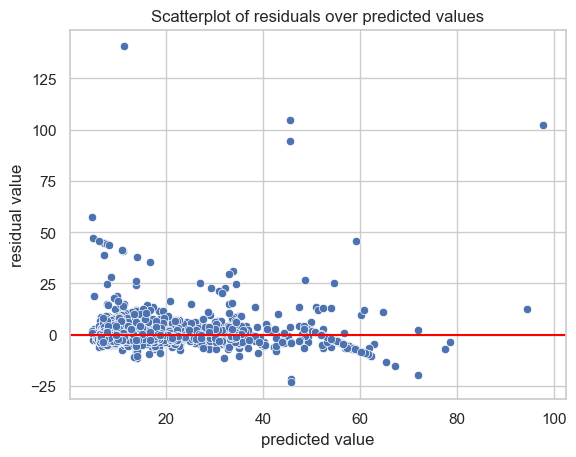

In [85]:
 # Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()


In [86]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=x.columns)
coefficients


,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.031938,9.644951,0.354993,0.133789,-0.036598


In [87]:
 # 1. Calculate SD of `mean_distance` in X_train data
print(x_train['mean_distance'].std())
# 2. Divide the model coefficient by the standard deviation
print(9.644951 / x_train['mean_distance'].std())

3.5594568310004817
2.7096693281960738


Now you can make a more intuitive interpretation: for every 3.55 miles traveled, the fare increased
by a mean of \$9.64 . 

Or, reduced: for every 1 mile traveled, the fare increased by a mean of \$2.7.